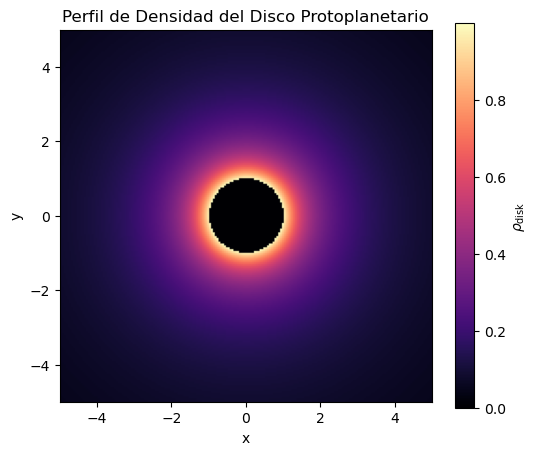

In [1]:
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
from formulas import density_profile
from formulas import Poisson_equation
from formulas import star_density
import numpy as np

#elegimos parametros generales
rho_0 = 1.0 #densidad de referencia
r_0 = 1.0 #radio de referencia
p = 1.5 #indice de densidad
r_min = 1.0 #radio del hueco interno

#creamos la malla
L = 5.0
N = 200
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
rho_disk = density_profile(R, rho_0, r_0, p, r_min)

#graficamos
plt.figure(figsize=(6,5))
plt.imshow(rho_disk, extent=[-L, L, -L, L], origin='lower', cmap='magma')
plt.colorbar(label=r'$\rho_{\mathrm{disk}}$')   
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perfil de Densidad del Disco Protoplanetario')
plt.show()

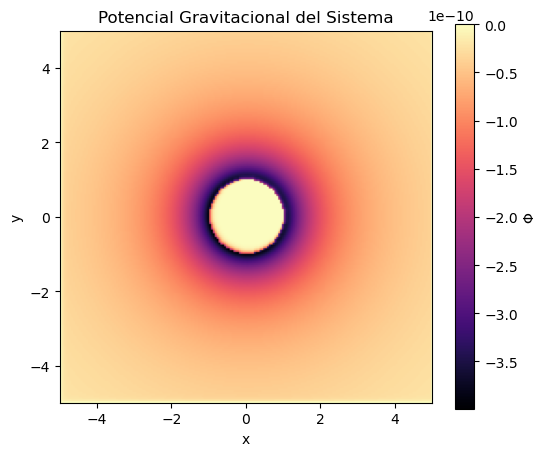

In [2]:
Mass_star = 1.989e30  # Masa del Sol
Radius_star = 0.00465  # Radio del Sol
star_density_profile = star_density(X, Y, Mass_star, Radius_star)

Gradient_potential = Poisson_equation(X, Y, 1, star_density_profile, rho_disk)
plt.figure(figsize=(6,5))
plt.imshow(Gradient_potential, extent=[-L, L, -L, L], origin='lower', cmap='magma')
plt.colorbar(label=r'$\Phi$')   
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potencial Gravitacional del Sistema')
plt.show()